In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import chardet
with open("/content/sample_data/spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [4]:
data=pd.read_csv("/content/sample_data/spam.csv",encoding= 'Windows-1252')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
to_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df=data.drop(to_drop,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


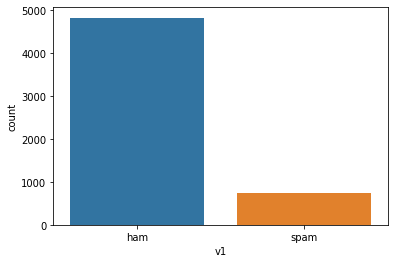

In [6]:
sns.countplot(df['v1'])

In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df["text_lower"] = df['v2'].str.lower()
df.head()

,v1,v2,text_lower
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [9]:
df["Target"]=df['v1'].str.lower()
df.head()

,v1,v2,text_lower,Target
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",ham
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,spam
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",ham


In [10]:
lower_=['v1','v2']
data=df.drop(lower_,axis=1)
data.head()

,text_lower,Target
0,"go until jurong point, crazy.. available only ...",ham
1,ok lar... joking wif u oni...,ham
2,free entry in 2 a wkly comp to win fa cup fina...,spam
3,u dun say so early hor... u c already then say...,ham
4,"nah i don't think he goes to usf, he lives aro...",ham


In [11]:
data.head()

,text_lower,Target
0,"go until jurong point, crazy.. available only ...",ham
1,ok lar... joking wif u oni...,ham
2,free entry in 2 a wkly comp to win fa cup fina...,spam
3,u dun say so early hor... u c already then say...,ham
4,"nah i don't think he goes to usf, he lives aro...",ham


In [12]:
import string
punct_to_remove=string.punctuation
def remove_pun(text):
  return text.translate(str.maketrans('','',punct_to_remove))
  
data['text_wo_pun']=data['text_lower'].apply(lambda text:remove_pun(text))
data.head()

,text_lower,Target,text_wo_pun
0,"go until jurong point, crazy.. available only ...",ham,go until jurong point crazy available only in ...
1,ok lar... joking wif u oni...,ham,ok lar joking wif u oni
2,free entry in 2 a wkly comp to win fa cup fina...,spam,free entry in 2 a wkly comp to win fa cup fina...
3,u dun say so early hor... u c already then say...,ham,u dun say so early hor u c already then say
4,"nah i don't think he goes to usf, he lives aro...",ham,nah i dont think he goes to usf he lives aroun...


In [13]:
data=data.drop('text_lower',axis=1)

In [14]:
data.head()

,Target,text_wo_pun
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [15]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [18]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["text_wo_stop"] = data["text_wo_pun"].apply(lambda text: remove_stopwords(text))
data.head()

,Target,text_wo_pun,text_wo_stop
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though


In [19]:
data=data.drop('text_wo_pun',axis=1)

In [20]:
data.head()

,Target,text_wo_stop
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [23]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["text_lemmatized"] = data["text_wo_stop"].apply(lambda text: lemmatize_words(text))
data.head()

,Target,text_wo_stop,text_lemmatized
0,ham,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though,nah dont think go usf life around though


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

In [25]:
x=data.drop('Target',axis=1)
x.head()

,text_wo_stop,text_lemmatized
0,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say,u dun say early hor u c already say
4,nah dont think goes usf lives around though,nah dont think go usf life around though


In [26]:
x=pd.get_dummies(x)

In [27]:
y=data['Target']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Target, dtype: int64

In [28]:
#imported SMOTEENN  to balanced dataset
from imblearn.combine import SMOTEENN
#fitting dataset to balanced dataset
smk = SMOTEENN()
x_res,y_res=smk.fit_resample(x,y)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2, random_state=42)

In [30]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [31]:
#imported Random forest and fitted model and predicting probability
from sklearn.ensemble import RandomForestClassifier
RFClassifier=RandomForestClassifier(n_estimators=5)
RFClassifier.fit(x_train,y_train)
pred_Random=RFClassifier.predict(x_test)

In [32]:
#finding out accuracy using Random forest 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_Random)

0.8877995642701525

In [35]:
predtrain_Random=RFClassifier.predict(x_train)
accuracy_score(y_train,predtrain_Random)

0.9760217983651226

In [34]:
#classification report to know accuracy and confusion matrix to know precision and recall , f1-score
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_Random))
print(classification_report(y_test,pred_Random))

[[ 53 103]
 [  0 762]]
              precision    recall  f1-score   support

           0       1.00      0.34      0.51       156
           1       0.88      1.00      0.94       762

    accuracy                           0.89       918
   macro avg       0.94      0.67      0.72       918
weighted avg       0.90      0.89      0.86       918

